In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import random
import seaborn as sns


import seaborn as sbs
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

onefig_size = (10,4)
multifigs_size = (12,4)

In [ ]:
original_df = pd.read_csv('/content/drive/MyDrive/BI/Datasets/fashion_products.csv')
original_df.head(15)

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
5,98,6,Dress,Adidas,Men's Fashion,47,1.379566,Yellow,L
6,16,7,Jeans,Gucci,Men's Fashion,37,1.356750,White,XL
7,63,8,Sweater,Zara,Kids' Fashion,64,4.360303,Blue,XL
8,96,9,Sweater,H&M,Men's Fashion,53,4.466182,Green,XL
9,36,10,T-shirt,Zara,Kids' Fashion,55,4.093234,White,XL


In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [ ]:
set(original_df['Product Name'])

{'Dress', 'Jeans', 'Shoes', 'Sweater', 'T-shirt'}

In [ ]:
original_df['Rating'] = original_df['Rating'].astype('int64')
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Product ID    1000 non-null   int64 
 2   Product Name  1000 non-null   object
 3   Brand         1000 non-null   object
 4   Category      1000 non-null   object
 5   Price         1000 non-null   int64 
 6   Rating        1000 non-null   int64 
 7   Color         1000 non-null   object
 8   Size          1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [ ]:
original_df.describe(include='all')

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
count,1000.00000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,5,5,3,NaN,NaN,6,4
top,NaN,NaN,Jeans,Nike,Kids' Fashion,NaN,NaN,White,XL
freq,NaN,NaN,231,214,351,NaN,NaN,193,254
mean,50.41900,500.500000,NaN,NaN,NaN,55.785000,2.491000,NaN,NaN
std,28.78131,288.819436,NaN,NaN,NaN,26.291748,1.119452,NaN,NaN
min,1.00000,1.000000,NaN,NaN,NaN,10.000000,1.000000,NaN,NaN
25%,26.00000,250.750000,NaN,NaN,NaN,33.000000,1.000000,NaN,NaN
50%,50.00000,500.500000,NaN,NaN,NaN,57.000000,2.000000,NaN,NaN
75%,75.00000,750.250000,NaN,NaN,NaN,78.250000,3.000000,NaN,NaN


In [ ]:
original_df.describe(include='float64')

ValueError: ignored

In [ ]:
df=original_df.copy()

In [ ]:
dup_ind = df.duplicated()
df[dup_ind]

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size


In [ ]:
df = df[dup_ind==False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Product ID    1000 non-null   int64 
 2   Product Name  1000 non-null   object
 3   Brand         1000 non-null   object
 4   Category      1000 non-null   object
 5   Price         1000 non-null   int64 
 6   Rating        1000 non-null   int64 
 7   Color         1000 non-null   object
 8   Size          1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [ ]:
df.isnull().sum()*100/df.shape[0]

Product Name    0.0
dtype: float64

In [ ]:
original_df = pd.read_csv('/content/drive/MyDrive/BI/Datasets/archive/fashion_products.csv')  # Thay 'original_df.csv' bằng tên thích hợp của tệp chứa dữ liệu

# Tạo bản đồ giữa tên sản phẩm và số tương ứng
product_mapping = {
    'Dress': 1,
    'T-shirt': 2,
    'Sweater': 3,
    'Jeans': 4,
    'Shoes': 5
}

# Thay đổi giá trị trong cột 'Product Name' bằng cách sử dụng mapping
original_df['Product Name'] = original_df['Product Name'].replace(product_mapping)

print(original_df)

     User ID  Product ID  Product Name   Brand         Category  Price  \
0         19           1             1  Adidas    Men's Fashion     40   
1         97           2             5     H&M  Women's Fashion     82   
2         25           3             1  Adidas  Women's Fashion     44   
3         57           4             5    Zara    Men's Fashion     23   
4         79           5             2  Adidas    Men's Fashion     79   
..       ...         ...           ...     ...              ...    ...   
995       20         996             5    Zara  Women's Fashion     55   
996       42         997             3    Nike    Kids' Fashion     13   
997        9         998             3    Zara    Men's Fashion     47   
998        8         999             2    Zara  Women's Fashion     68   
999       91        1000             5  Adidas  Women's Fashion     79   

       Rating   Color Size  
0    1.043159   Black   XL  
1    4.026416   Black    L  
2    3.337938  Yellow   

In [ ]:
set(original_df['Product Name'])

{1, 2, 3, 4, 5}

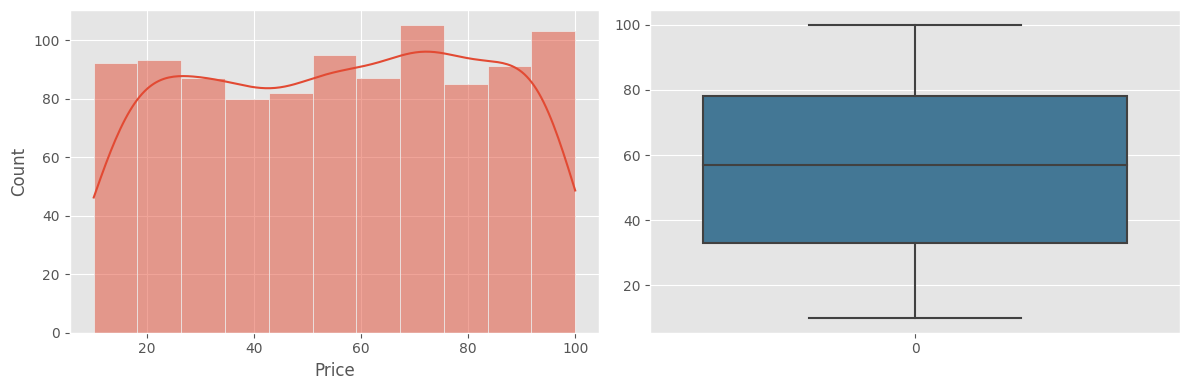

In [ ]:
fig,axs = plt.subplots(ncols=2, figsize=multifigs_size)
sns.histplot(df['Price'], kde =True, stat='count', ax=axs[0], palette='mako')
sns.boxplot(df['Price'], ax= axs[1], palette='mako')
plt.tight_layout()

In [ ]:
cat_df = df.select_dtypes(include="object").copy()
cat_df.head()

,Product Name,Brand,Category,Color,Size
0,Dress,Adidas,Men's Fashion,Black,XL
1,Shoes,H&M,Women's Fashion,Black,L
2,Dress,Adidas,Women's Fashion,Yellow,XL
3,Shoes,Zara,Men's Fashion,White,S
4,T-shirt,Adidas,Men's Fashion,Black,M


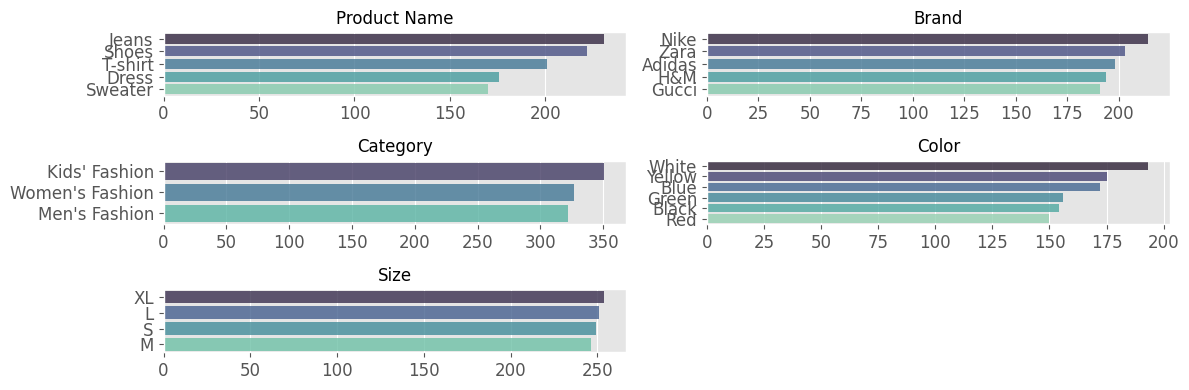

In [ ]:
num_plot = len(cat_df.columns)
num_cols = min(num_plot, 2)
num_rows = int(num_plot / num_cols) + (1 if num_plot % num_cols != 0 else 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=multifigs_size)
if isinstance(axes, np.ndarray):
  list_axes = list(axes.flat)
else:
  list_axes = [axes]
for index, col in enumerate(cat_df.columns):
  df_count = df[col].value_counts()
  if (df_count.index.dtype == np.int64):
    df_count.index = map(str, df_count.index)
  sns.barplot(ax = list_axes[index], x = df_count.values, y = df_count.index, alpha=0.8, palette='mako')
  list_axes[index].set_title(col, fontsize=12)
  list_axes[index].tick_params(axis="x", labelsize=12)
  list_axes[index].tick_params(axis="y", labelsize=12)
for i in range(num_plot, len(list_axes)):
  list_axes[i].set_visible(False)
  fig.tight_layout()
  plt.show()

In [ ]:
for col in cat_df.columns:
  temp_df = df[col].value_counts().rename_axis(col).reset_index(name='counts')
  temp_df["frequency"] = round(temp_df["counts"]/len(df) *100,2)
  print(temp_df)

  Product Name  counts  frequency
0        Jeans     231       23.1
1        Shoes     222       22.2
2      T-shirt     201       20.1
3        Dress     176       17.6
4      Sweater     170       17.0
    Brand  counts  frequency
0    Nike     214       21.4
1    Zara     203       20.3
2  Adidas     198       19.8
3     H&M     194       19.4
4   Gucci     191       19.1
          Category  counts  frequency
0    Kids' Fashion     351       35.1
1  Women's Fashion     327       32.7
2    Men's Fashion     322       32.2
    Color  counts  frequency
0   White     193       19.3
1  Yellow     175       17.5
2    Blue     172       17.2
3   Green     156       15.6
4   Black     154       15.4
5     Red     150       15.0
  Size  counts  frequency
0   XL     254       25.4
1    L     251       25.1
2    S     249       24.9
3    M     246       24.6


ValueError: ignored

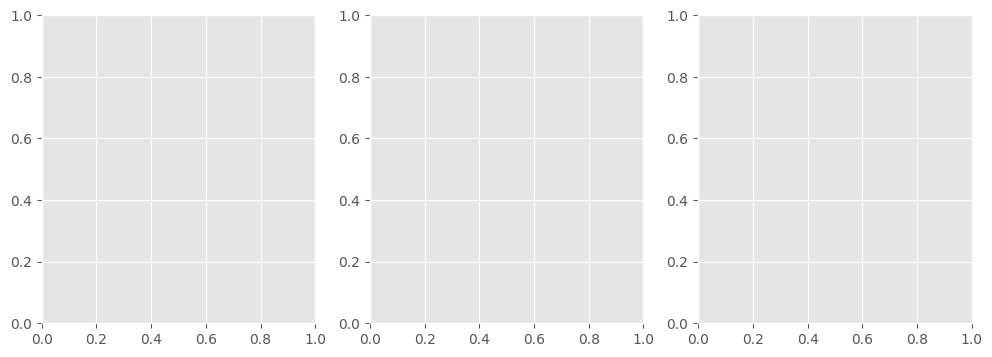

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='Evaluate', data=df,ax=axs[0],color='grey')
sns.barplot(x='Evaluate', y='Price', data=df, ax=axs[1])
sns.boxplot(x='Evaluate', y='Price', data=df ,ax=axs[2])
plt.tight_layout()

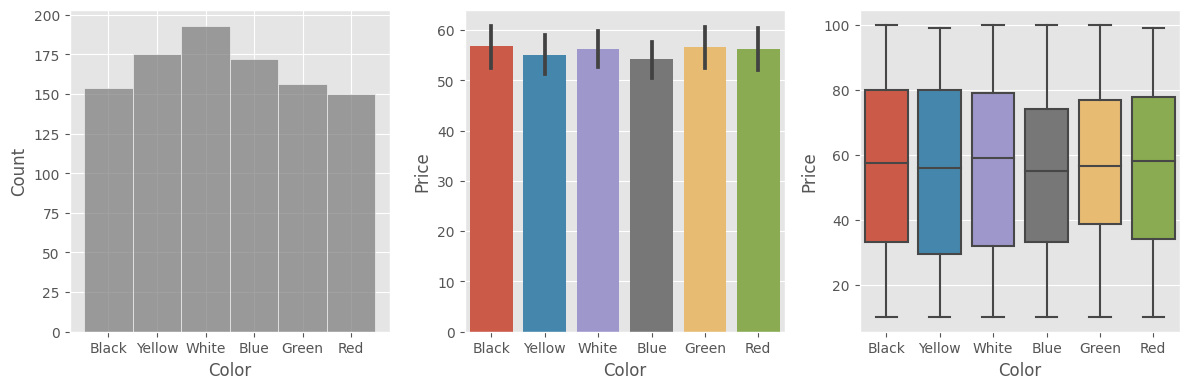

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='Color', data=df,ax=axs[0],color='grey')
sns.barplot(x='Color', y='Price', data=df, ax=axs[1])
sns.boxplot(x='Color', y='Price', data=df ,ax=axs[2])
plt.tight_layout()

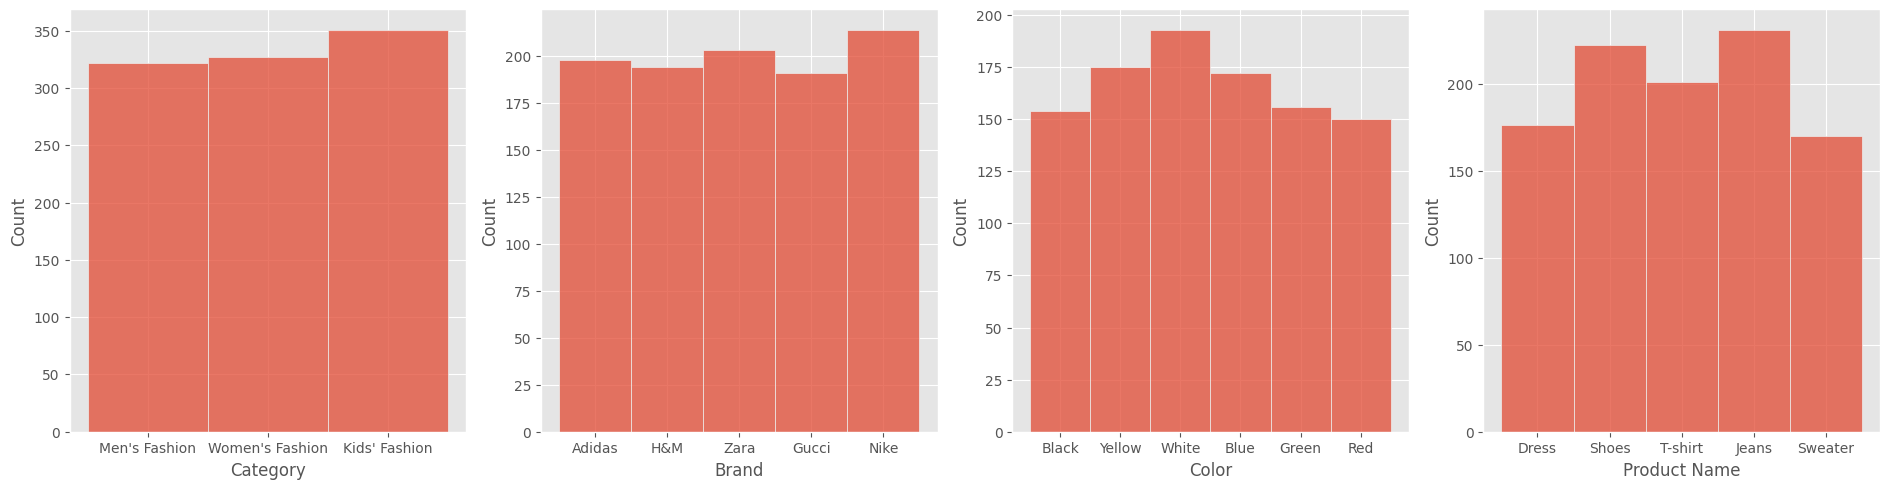

In [41]:
fig, axs = plt.subplots(ncols=4, figsize=(19, 5))
sns.histplot(x='Category', data=df,ax=axs[0])
sns.histplot(x='Brand', data=df,ax=axs[1])
sns.histplot(x='Color', data=df,ax=axs[2])
sns.histplot(x='Product Name', data=df,ax=axs[3])
plt.tight_layout()

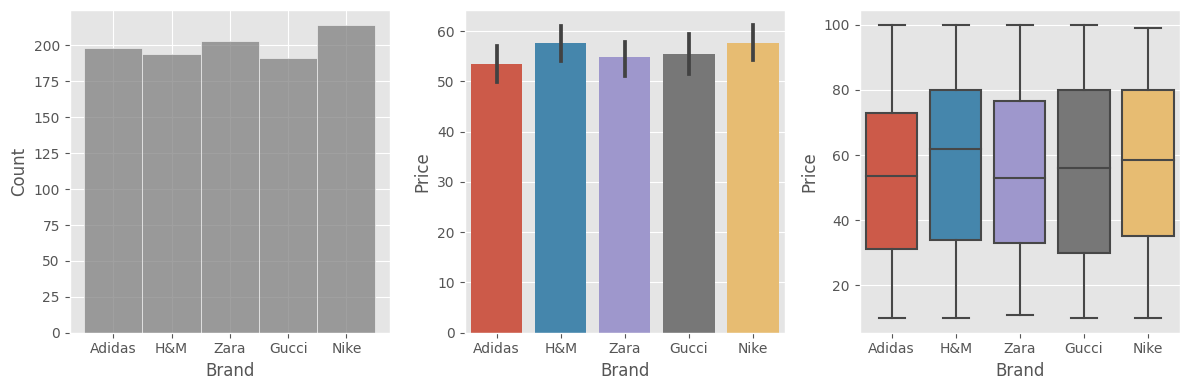

In [ ]:

fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='Brand', data=df,ax=axs[0],color='grey')
sns.barplot(x='Brand', y='Price', data=df, ax=axs[1])
sns.boxplot(x='Brand', y='Price', data=df ,ax=axs[2])
plt.tight_layout()

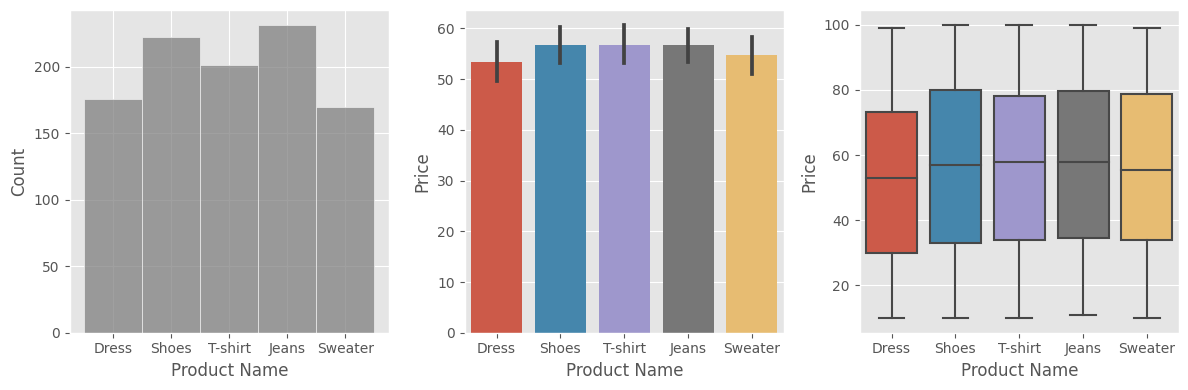

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='Product Name', data=df,ax=axs[0],color='grey')
sns.barplot(x='Product Name', y='Price', data=df, ax=axs[1])
sns.boxplot(x='Product Name', y='Price', data=df ,ax=axs[2])
plt.tight_layout()

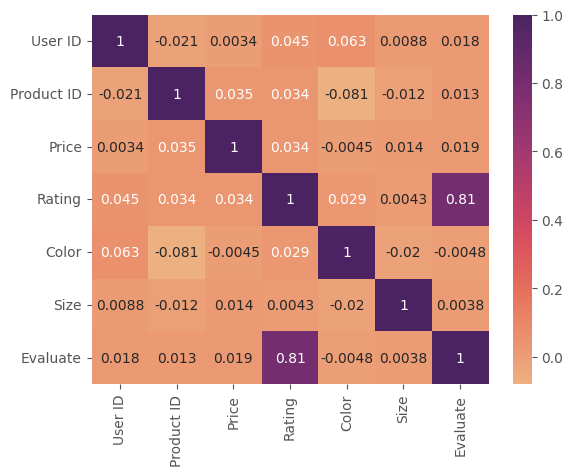

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_transform = df.copy()
label = LabelEncoder()
label.fit(df.Size.drop_duplicates())
df_transform.Size = label.transform(df.Size)
label.fit(df.Evaluate.drop_duplicates())
df_transform.Evaluate = label.transform(df.Evaluate)
label.fit(df.Color.drop_duplicates())
df_transform.Color = label.transform(df.Color)

corr_matrix = df_transform.corr()
sns.heatmap(corr_matrix, annot=True,cmap='flare')
plt.show()

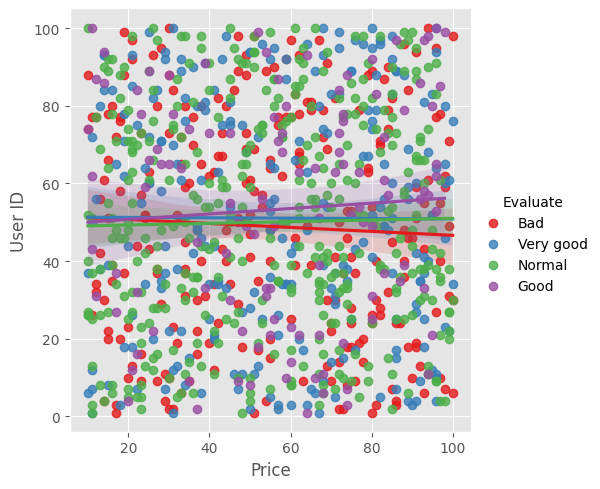

In [ ]:
sns.lmplot(x='Price', y='User ID', data=df, hue='Evaluate', palette= 'Set1')

<Axes: xlabel='Product Name', ylabel='Price'>

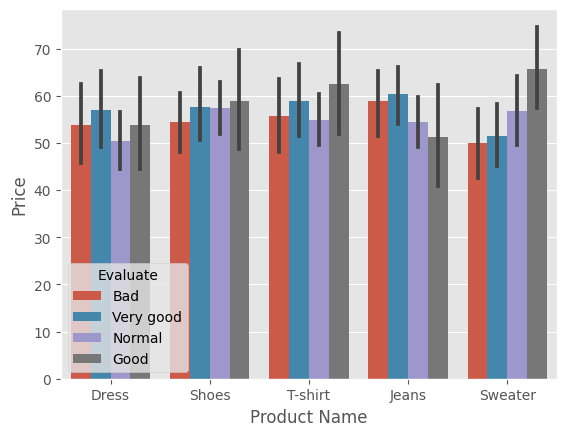

In [ ]:
sns.barplot(x='Product Name', y='Price',  hue='Evaluate', data=df)

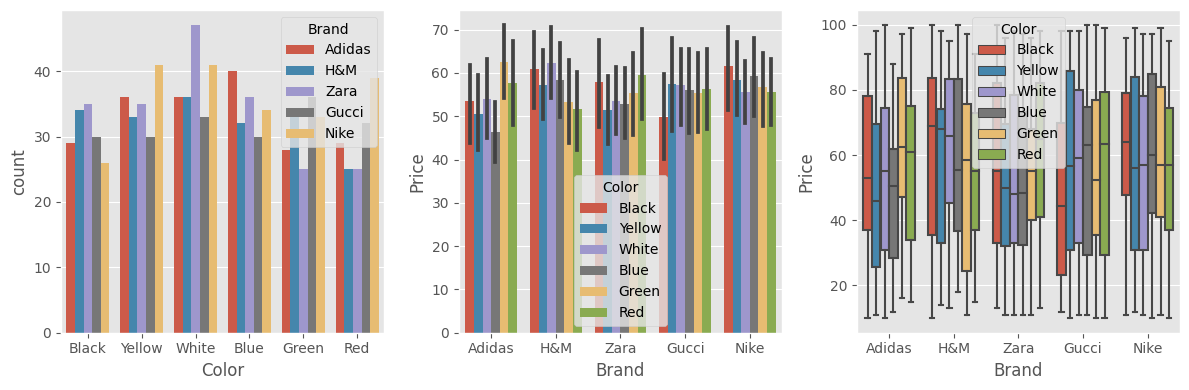

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.countplot(x='Color', hue='Brand', data=df,ax=axs[0])
sns.barplot(x='Brand', y='Price',hue='Color', data=df, ax=axs[1])
sns.boxplot(x='Brand', y='Price',hue='Color', data=df ,ax=axs[2])
plt.tight_layout()

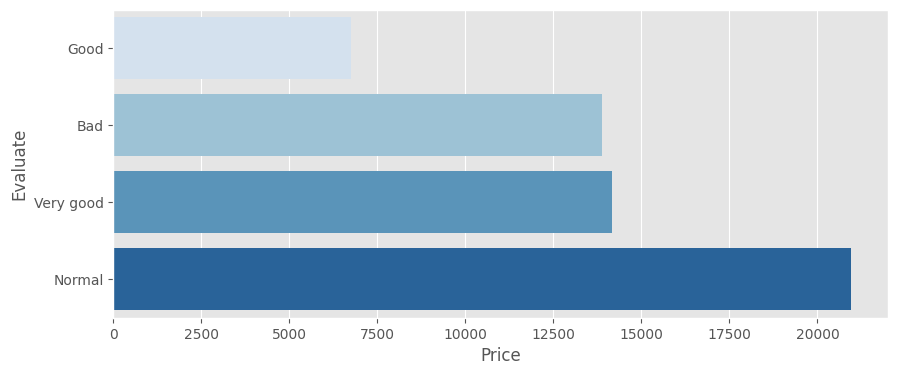

In [ ]:
charges = df['Price'].groupby(df.Evaluate).sum().sort_values(ascending=True)
f, ax = plt.subplots(1,1, figsize=onefig_size)
ax = sns.barplot(x=charges.head(),y= charges.head().index, palette='Blues', ax=ax)

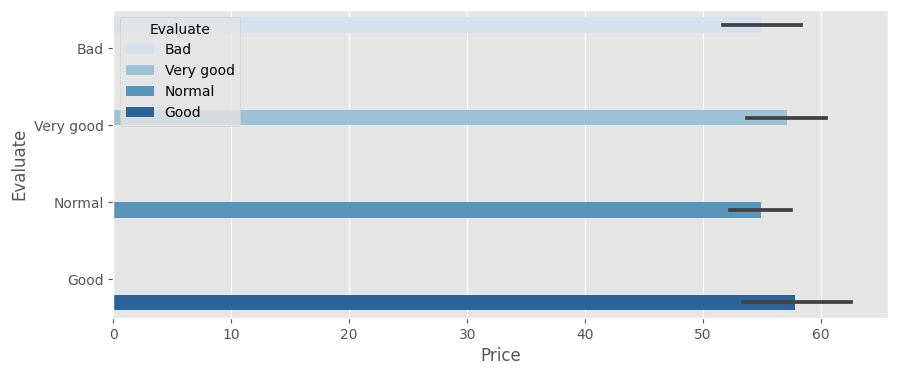

In [ ]:
f, ax = plt.subplots(1,1, figsize=onefig_size)
ax = sns.barplot(x='Price',y= 'Evaluate', hue='Evaluate' ,data=df,palette='Blues', ax=ax)

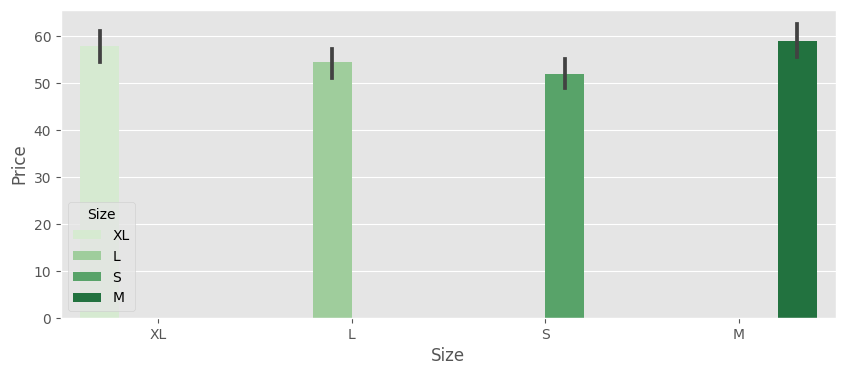

In [ ]:
f, ax = plt.subplots(1,1, figsize=onefig_size)
ax = sns.barplot(x='Size',y= 'Price', hue='Size',data=df,palette='Greens', ax=ax)

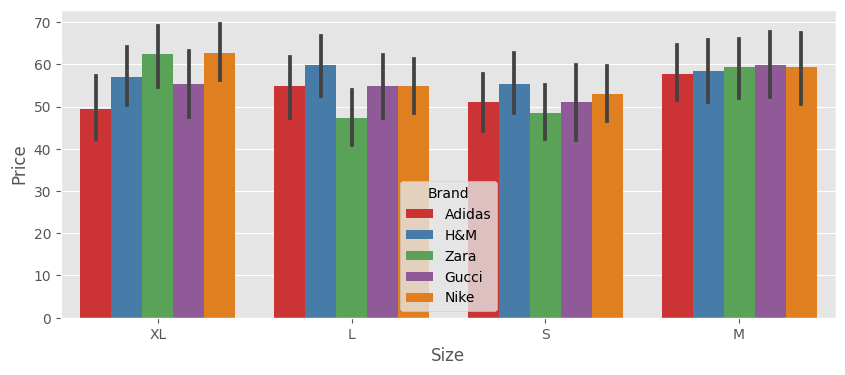

In [ ]:
f, ax = plt.subplots(1,1, figsize=onefig_size)
ax = sns.barplot(x='Size',y= 'Price', hue='Brand' ,data=df,palette='Set1')

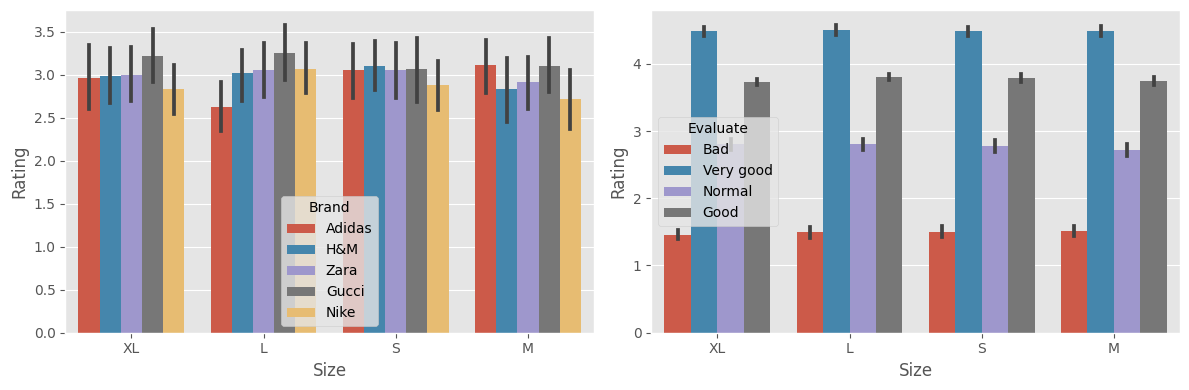

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=multifigs_size)

sns.barplot(x='Size', y='Rating',hue='Brand', data=df, ax=axs[0])
sns.barplot(x='Size', y='Rating', data=df ,hue='Evaluate', ax=axs[1])
plt.tight_layout()

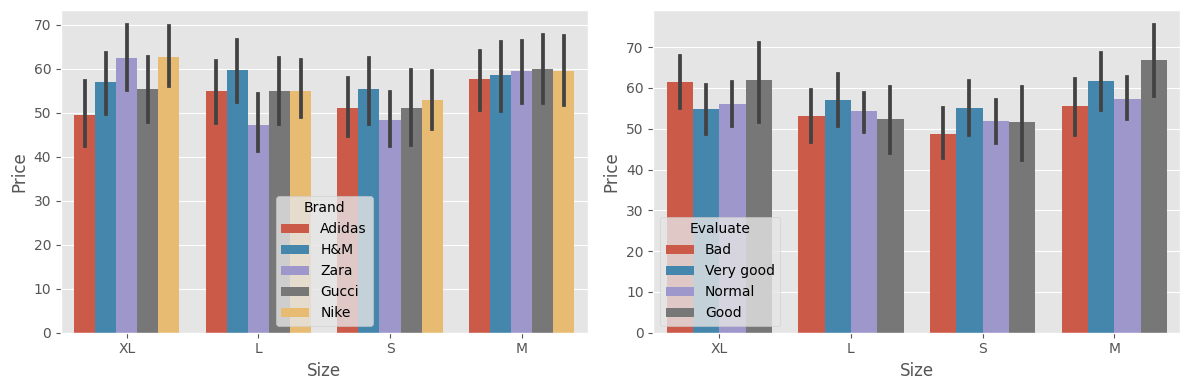

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=multifigs_size)

sns.barplot(x='Size', y='Price',hue='Brand', data=df, ax=axs[0])
sns.barplot(x='Size', y='Price', data=df ,hue='Evaluate', ax=axs[1])
plt.tight_layout()

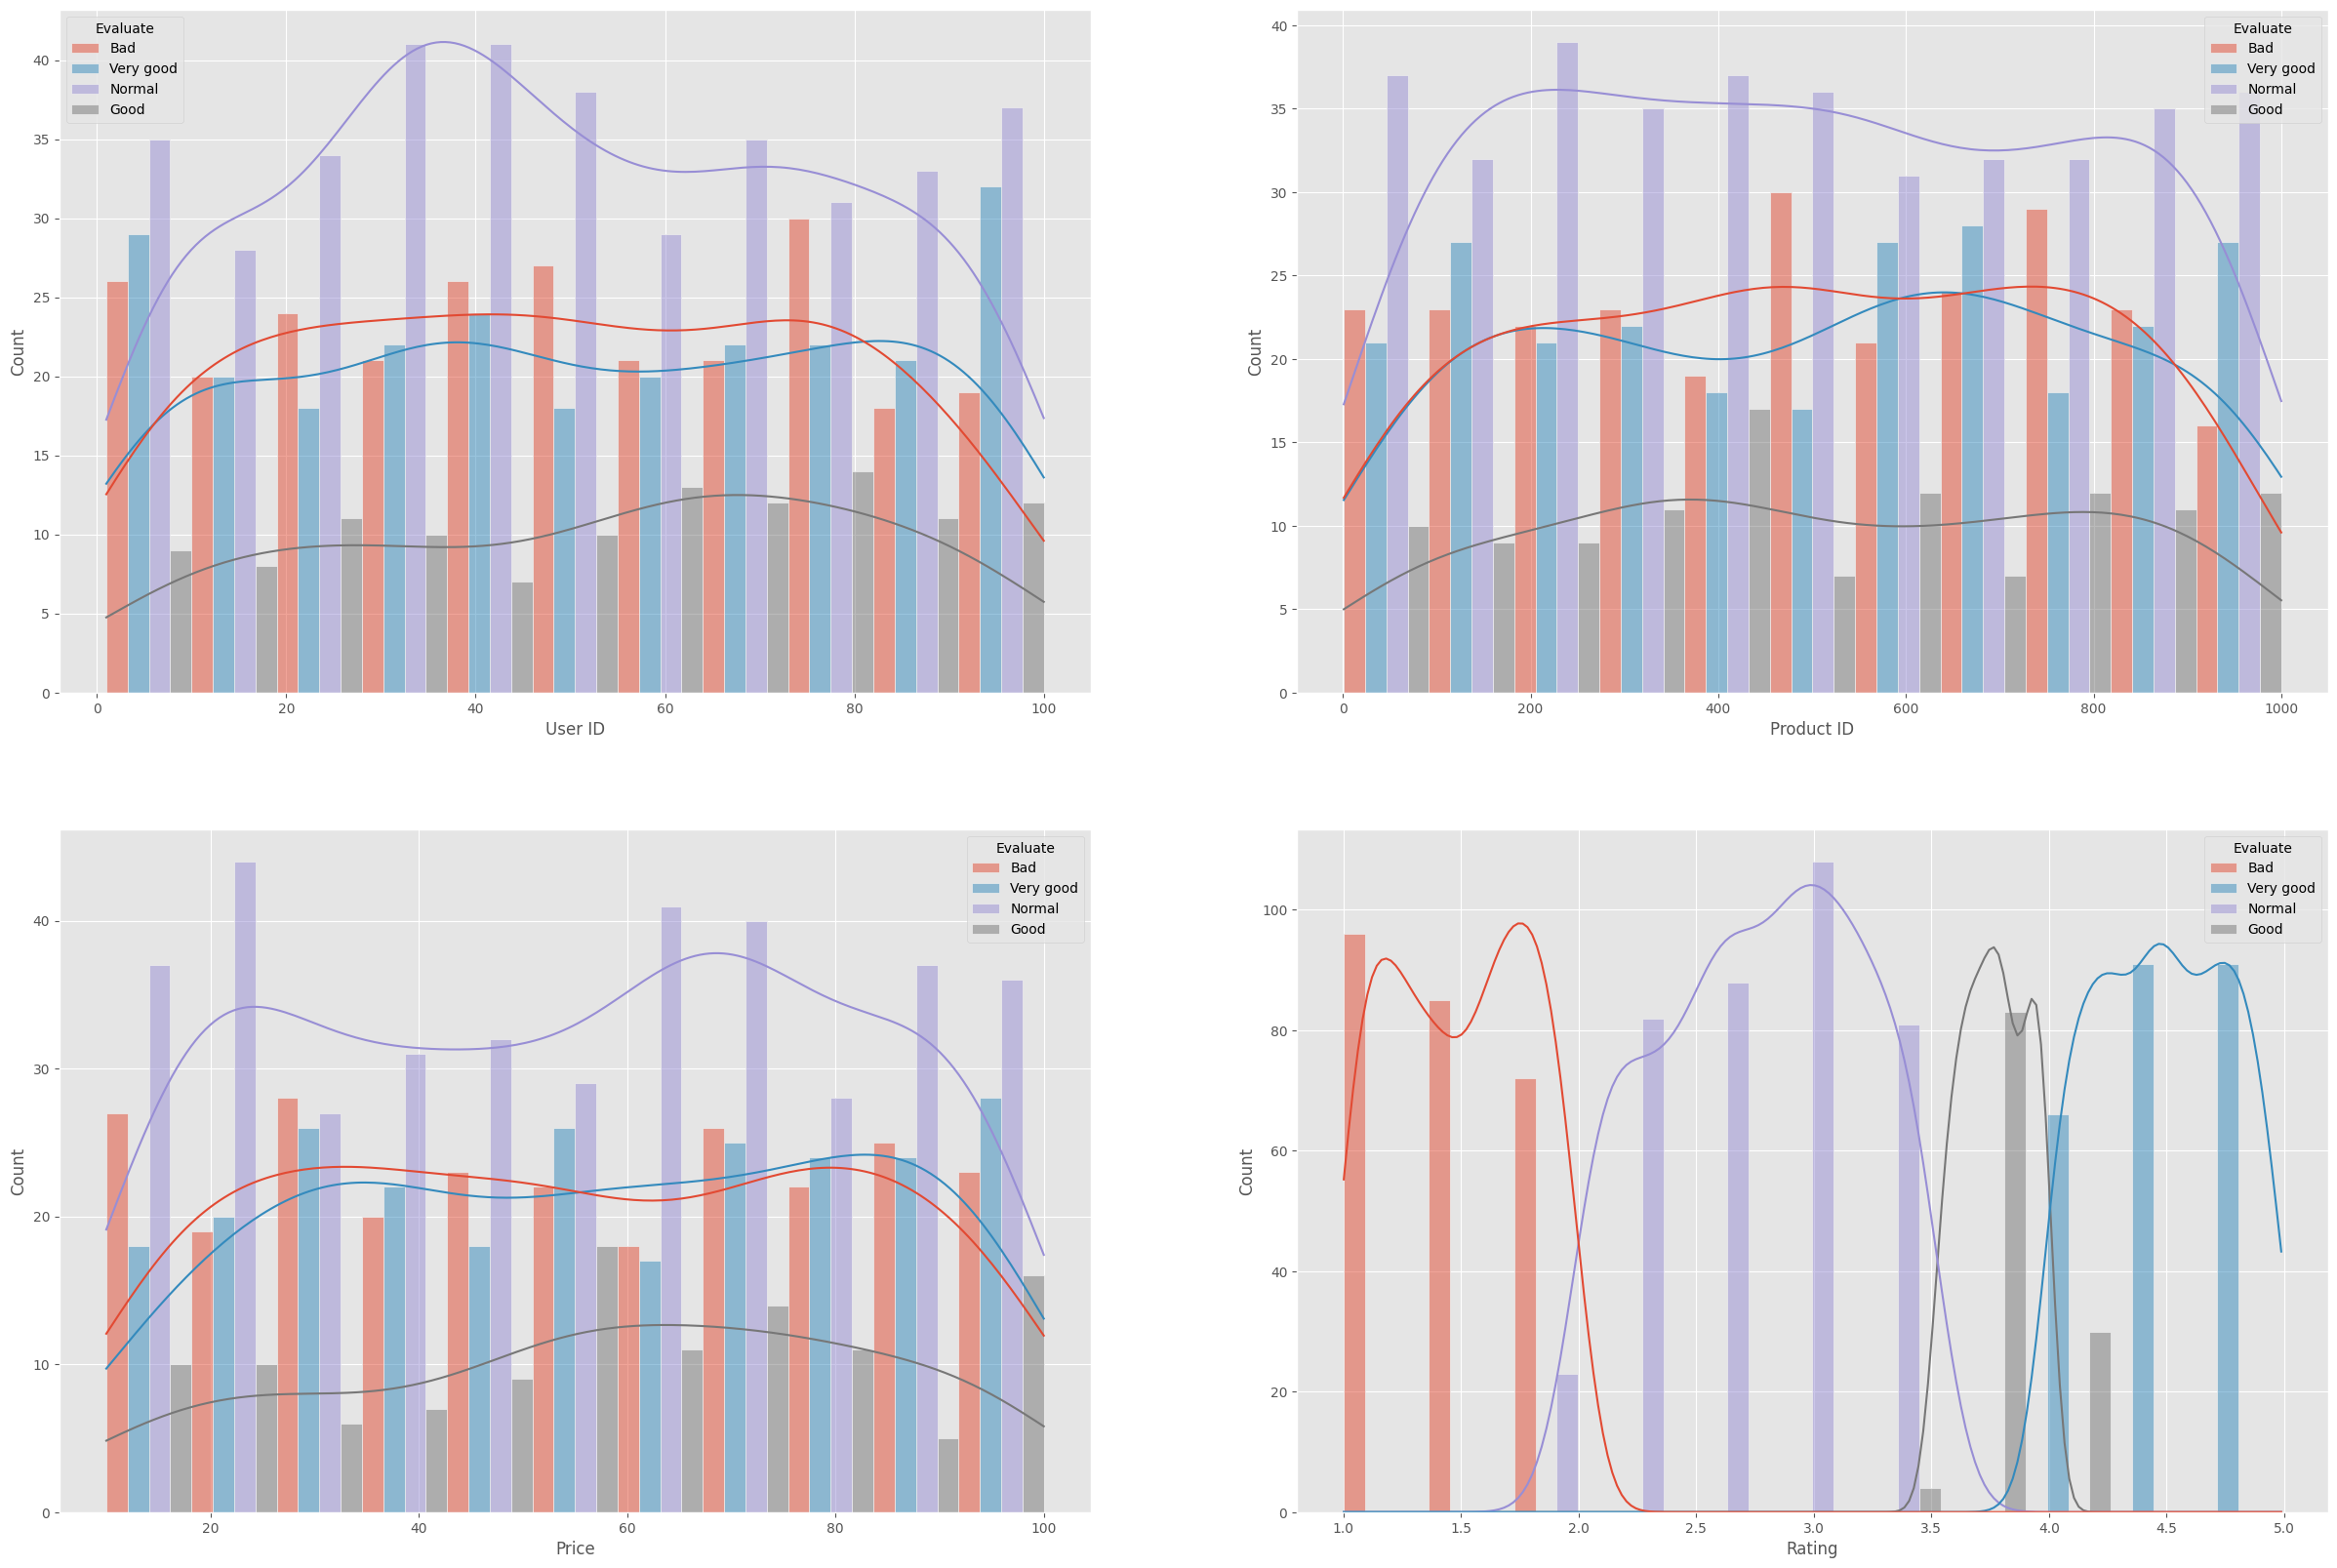

In [ ]:
fig,axs = plt.subplots(nrows=2,ncols=2, figsize=(30,20))
for i, ax in enumerate(axs.flatten()):
    if i < len(df.select_dtypes(include=np.number).columns):
      sns.histplot(data=df,x=df[df.select_dtypes(include=np.number).columns[i]], kde=True,hue='Evaluate', multiple='dodge',ax=ax)
plt.show()